# FOM Convergence Analysis

In [1]:
import analysis.core as core
import analysis.fom as fom
import numpy as np
import matplotlib.pyplot as plt
import cPickle
%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

/home/josh/lib/anaconda2/lib/python2.7/site-packages/pyne/serpent.py:11: QAWarning: pyne.serpent is not yet QA compliant.
  warn(__name__ + " is not yet QA compliant.", QAWarning)


In [2]:
def plot_setup(xlabel, ylabel, title, font=12):
    plt.figure(figsize=(12, 9))
    ax = plt.subplot(111)  
    #ax.spines["top"].set_visible(False)  
    #ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left()
    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)
    plt.ylabel(ylabel,fontsize=font)
    plt.xlabel(xlabel,fontsize=font)
    plt.title(title, y=1.08, fontsize = font)
    #plt.rc('grid', linestyle="--", color='gray')
    plt.grid('on')

# Homogenous Fuel Element

## No WDT vs. All WDT

Get files from scratch location.

In [4]:
base = '/home/josh/downloads/scratch/homog/S0100/'
x_homog = [0.1]
dir = [base + 'W' + str('{:0>4d}'.format(int(n*1000))) for n in x_homog]
name = [str(n) for n in x_homog]
homog_comp = fom.Comparator(dir,name)

Uploaded 569 files.


In [32]:
reload(fom)
test = fom.Analyzer('./tests/fom_data')

Uploaded 3 files.


In [61]:
collapse = test.get_collapse('TEST_MAT', [1,3,2], fom = False, cycle = False)[:,1:2]
cpu    = np.array([10.5, 20.5, 30.5])

In [62]:
np.shape(collapse)

#cpu.shape = (3,1)
#np.power(np.multiply(np.power(collapse,2), cpu),-1)

(3, 1)

In [20]:
base = '/home/josh/downloads/scratch/homog/S0100/'
x_homog = np.linspace(0.1,1,10)
dir = [base + 'W' + str('{:0>4d}'.format(int(n*1000))) for n in x_homog]
name = [str(n) for n in x_homog]
homog_comp = fom.Comparator(dir,name)

Uploaded 569 files.
Uploaded 426 files.
Uploaded 186 files.
Uploaded 302 files.
Uploaded 583 files.
Uploaded 305 files.
Uploaded 308 files.
Uploaded 554 files.
Uploaded 423 files.
Uploaded 198 files.


In [3]:
base = '/home/josh/downloads/scratch/pwr/S0100/'
x_pwr = np.linspace(0.1,1,10)
dir = [base + 'W' + str('{:0>4d}'.format(int(n*1000))) for n in x_pwr]
name = [str(n) for n in x_pwr]
pwr_comp = fom.Comparator(dir,name)

Uploaded 1450 files.
Uploaded 630 files.
Uploaded 630 files.
Uploaded 582 files.
Uploaded 937 files.
Uploaded 911 files.
Uploaded 1058 files.
Uploaded 1410 files.
Uploaded 1002 files.
Uploaded 403 files.


In [26]:
base = '/home/josh/downloads/scratch/fast_pincell/S0100/'
x_fast = np.linspace(0.1,1,10)
dir = [base + 'W' + str('{:0>4d}'.format(int(n*1000))) for n in x_fast]
name = [str(n) for n in x_fast]
fast_comp = fom.Comparator(dir,name)

Uploaded 958 files.
Uploaded 486 files.
Uploaded 660 files.
Uploaded 465 files.
Uploaded 420 files.
Uploaded 784 files.
Uploaded 362 files.
Uploaded 366 files.
Uploaded 437 files.
Uploaded 492 files.


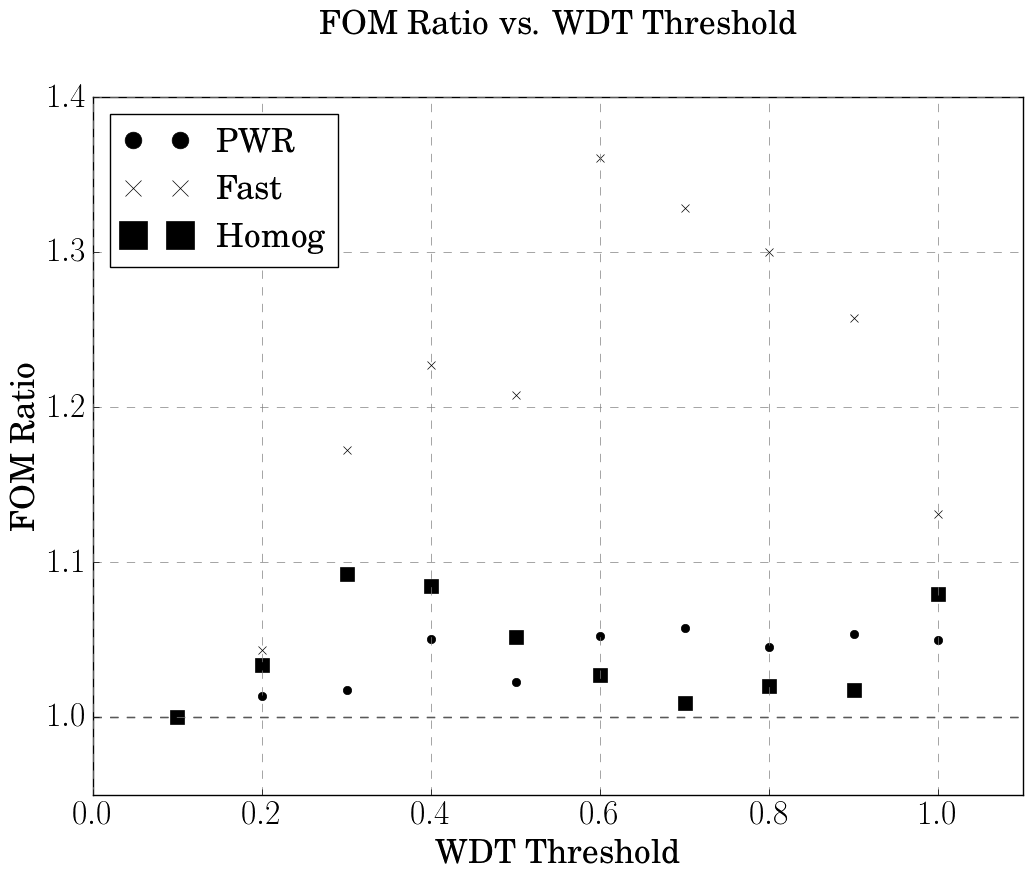

In [42]:
label = 'INF_FLX'
grp = 1
n_pts = 20
names, ratio = pwr_comp.ratio(label,grp,n_pts)
names2, ratio2 = homog_comp.ratio(label,grp,n_pts)
names3, ratio3 = fast_comp.ratio(label,grp,n_pts)

plot_setup('WDT Threshold','FOM Ratio','FOM Ratio vs. WDT Threshold',24)

plt.plot(x_pwr,ratio,'ko',markersize=6, label='PWR')
plt.plot(x_fast,ratio3,'xk',markersize=6, label='Fast')
plt.plot(x_homog,ratio2,'ks',markersize=10, label='Homog')

plt.xlim([0,1.1])
plt.axhline(y=1.0, color='k',linestyle='--')
plt.legend(loc='best', markerscale = 2.0, fontsize = 24)

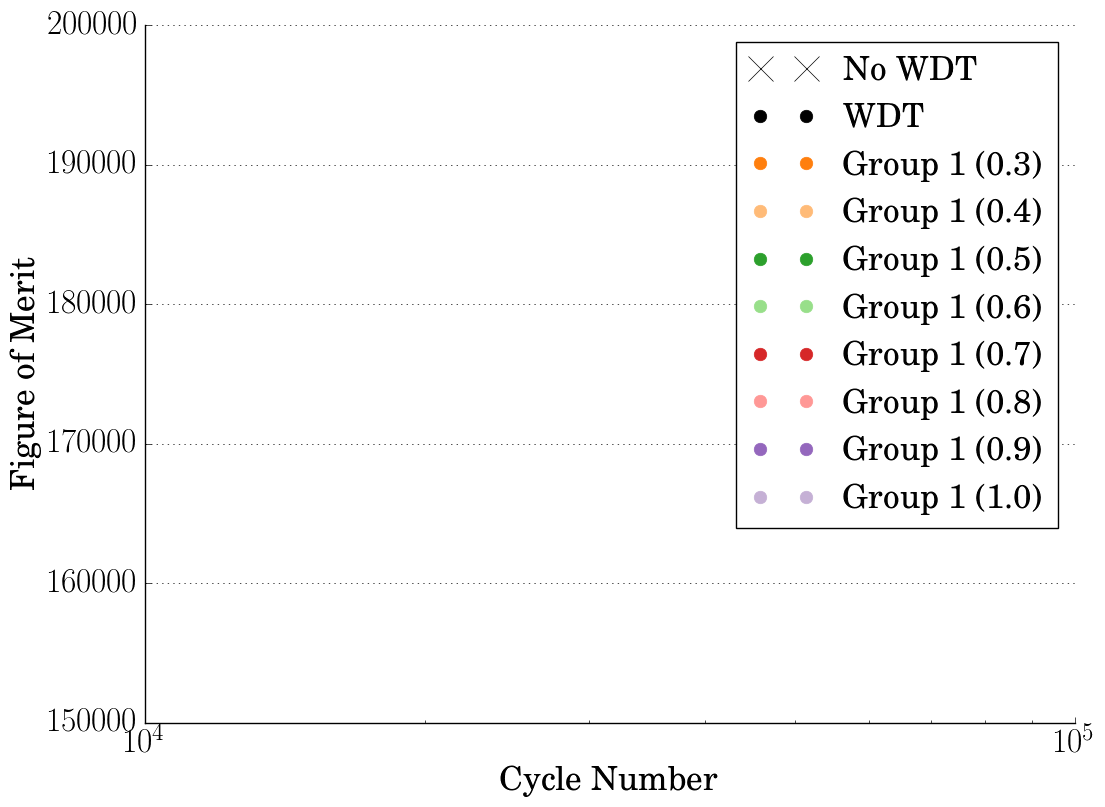

In [5]:
label = 'INF_FLX'
grp = 1
pts = 50
font_size = 24
pwr_comp.plot(label, grp)
#plt.axhline(y=my_comp.data[0].get_avg(label, grp, pts), linestyle='--', color='k')
#plt.axhline(y=my_comp.data[1].get_avg(label, grp, pts), linestyle='--', color='k')
plt.ylim([1.5e5,2e5])
plt.xlim([1e4,1e5])
plt.ylabel('Figure of Merit', fontsize=font_size)
plt.xlabel('Cycle Number', fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.legend(fontsize=font_size, loc='best',markerscale=2.0)
line = plt.gca().get_lines()[0]
line.set_marker('x') 
line.set_color('black')
line2 = plt.gca().get_lines()[1]
line2.set_color('black')
L = plt.legend(fontsize=font_size, loc='best',markerscale=3.0)
L.get_texts()[0].set_text('No WDT')
L.get_texts()[1].set_text('WDT')

#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.title('')
plt.grid('on')
plt.show()

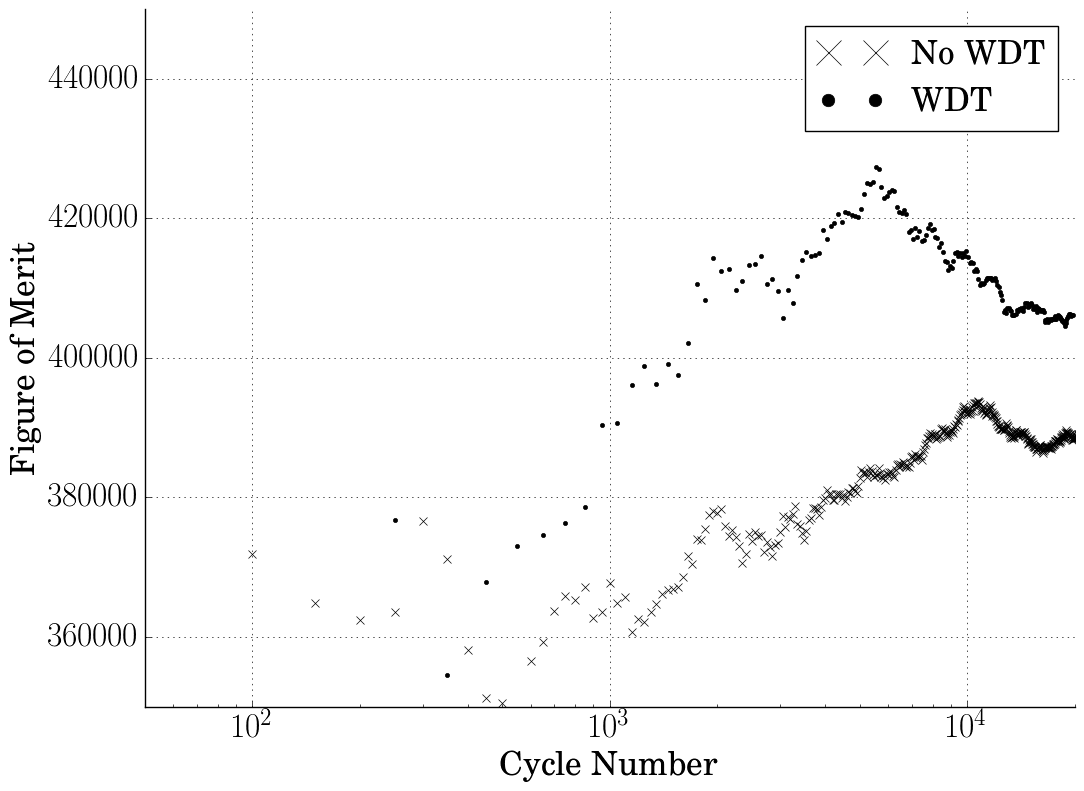

In [79]:
label = 'ANA_KEFF'
grp = 1
pts = 50
font_size = 24
my_comp.plot(label, grp)
#plt.axhline(y=my_comp.data[0].get_avg(label, grp, pts), linestyle='--', color='k')
#plt.axhline(y=my_comp.data[1].get_avg(label, grp, pts), linestyle='--', color='k')
plt.ylim([3.5e5,4.5e5])
plt.xlim([0,2e4])
plt.ylabel('Figure of Merit', fontsize=font_size)
plt.xlabel('Cycle Number', fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.legend(fontsize=font_size, loc='best',markerscale=2.0)
line = plt.gca().get_lines()[0]
line.set_marker('x') 
line.set_color('black')
line2 = plt.gca().get_lines()[1]
line2.set_color('black')
L = plt.legend(fontsize=font_size, loc='best',markerscale=3.0)
L.get_texts()[0].set_text('No WDT')
L.get_texts()[1].set_text('WDT')

#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.title('')
plt.grid('on')

## WDT Th = 0.2 vs. No WDT

In [32]:
reload(fom)
dir = ['/home/josh/downloads/scratch/homog/no_wdt','/home/josh/downloads/scratch/homog/wdt_0200']
name = ['No WDT','0.2 WDT']
comp_2 = fom.Comparator(dir,name)

Uploaded 569 files.
Uploaded 426 files.


In [33]:
labels = ['INF_FLX','INF_TOT','INF_ABS','INF_CAPT']
mat_labels = ['INF_SP0','INF_SP1','INF_SP2']
comp_2.compare(labels,mat_labels,100)

INF_FLX Group: 1: 0.2 WDT Ratio: 1.03739904907
INF_FLX Group: 2: 0.2 WDT Ratio: 1.0105692839
INF_FLX Group: 3: 0.2 WDT Ratio: 1.00128708981
INF_FLX Group: 4: 0.2 WDT Ratio: 1.00488153013
INF_FLX Group: 5: No WDT Ratio: 1.02052828151
INF_FLX Group: 6: No WDT Ratio: 1.02987887813
INF_FLX Group: 7: No WDT Ratio: 1.00943041287
INF_FLX Group: 8: No WDT Ratio: 1.0468058438
INF_FLX Group: 9: No WDT Ratio: 1.0725468444
INF_FLX Group: 10: No WDT Ratio: 1.06864624374
INF_FLX Group: 11: No WDT Ratio: 1.03328182266
INF_TOT Group: 1: 0.2 WDT Ratio: 1.00962799054
INF_TOT Group: 2: No WDT Ratio: 1.02588853163
INF_TOT Group: 3: 0.2 WDT Ratio: 1.02608983434
INF_TOT Group: 4: 0.2 WDT Ratio: 1.02641580174
INF_TOT Group: 5: 0.2 WDT Ratio: 1.01015121049
INF_TOT Group: 6: 0.2 WDT Ratio: 1.02378940084
INF_TOT Group: 7: No WDT Ratio: 1.03370230368
INF_TOT Group: 8: 0.2 WDT Ratio: 1.01939480118
INF_TOT Group: 9: No WDT Ratio: 1.04576928391
INF_TOT Group: 10: No WDT Ratio: 1.00889772225
INF_TOT Group: 11: No WD

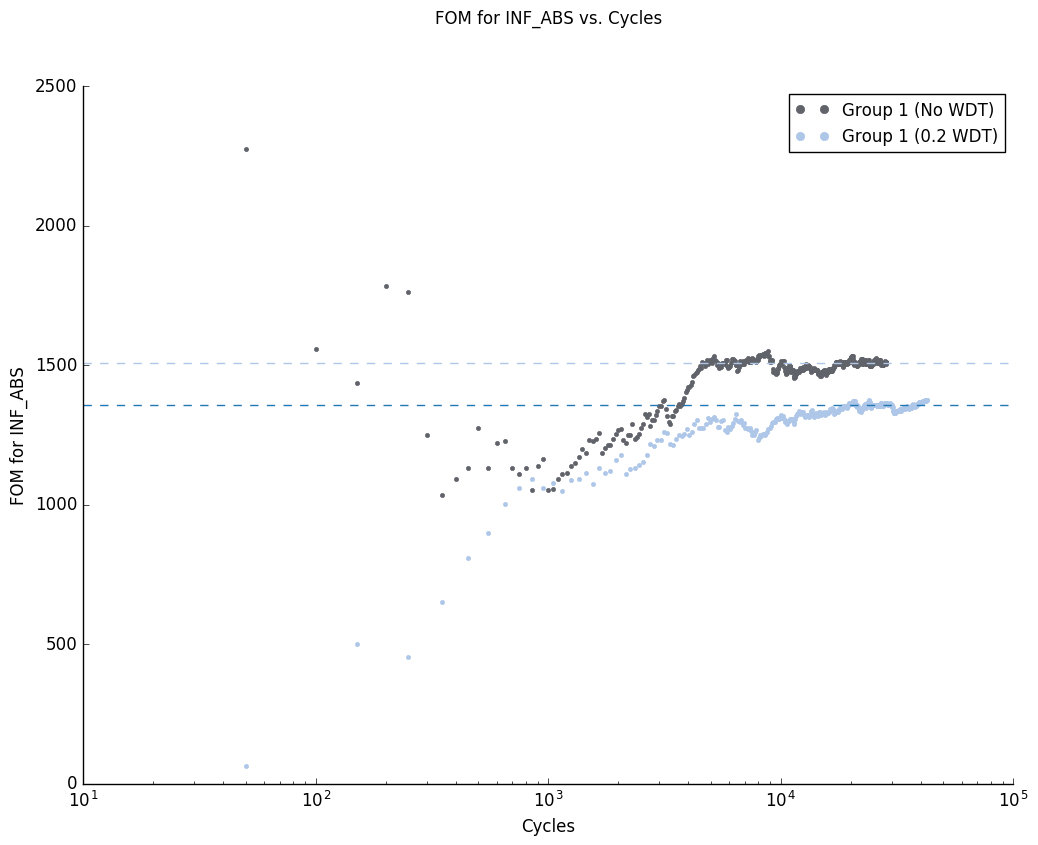

In [36]:
label = 'INF_ABS'
grp = 1
pts = 100
my_comp.plot(label, grp)
plt.axhline(y=my_comp.data[1].get_avg(label, grp, pts), linestyle='--', color = (31/255., 119/255., 180/255.))
plt.axhline(y=my_comp.data[0].get_avg(label, grp, pts), linestyle='--', color = (174/255., 199/255., 232/255.))

## Step 3: Look at the data

Pick a parameter that you are interested in and plot it! Passing `fom = True` shows the FOM, and `fom = False` will show the relative error. You also must specify groups or matrix entries, depending if the parameter is an array value or a matrix value.

In [38]:
test_analyzer = fom.Analyzer('./tests/fom_data/')

Uploaded 3 files.


In [82]:
data = test_analyzer.__val_vs__('TEST_VAL',1)
data = data[data[:,0].argsort()]
np.mean(data[-2:,1])
print data
print data[-2:,1]

[[  1.00000000e+01   1.05820106e+06]
 [  2.00000000e+01   1.21951220e+06]
 [  3.00000000e+01   3.27868852e+06]]
[ 1219512.19512195  3278688.52459016]


In [28]:
label = 'INF_FLX'
my_comp.data[0].get_data('INF_SP0',2)

array([[ 77250.,      0.],
       [ 74250.,      0.],
       [ 10750.,      0.],
       ..., 
       [ 15050.,      0.],
       [  7150.,      0.],
       [  6650.,      0.]])

## Comparator Class

The comparator will upload all the `.m` files for Serpent 2 runs, and allow comparative plotting of the FOM convergence. It accepts two or more directories, and names for those directories.

In [14]:
reload(fom)
dir1 = '/home/josh/Downloads/no_wdt/'
#dir2 = '/home/josh/Downloads/some_wdt/'
#dir3 = '/home/josh/Downloads/full_wdt'
name1 = 'No WDT'
#name2 = '0.5 WDTTh'
#name3 = 'Full WDT'
#my_comparator = fom.Comparator([dir1, dir2, dir3], [name1, name2, name3])
#my_comparator = fom.Comparator([dir1, dir2], [name1, name2])
my_comparator = fom.Comparator([dir1], [name1])

Uploaded 1450 files.


As with the Analyzer class, it accepts either group numbers for Serpent output parameters, or indices when the output parameter is a matrix.

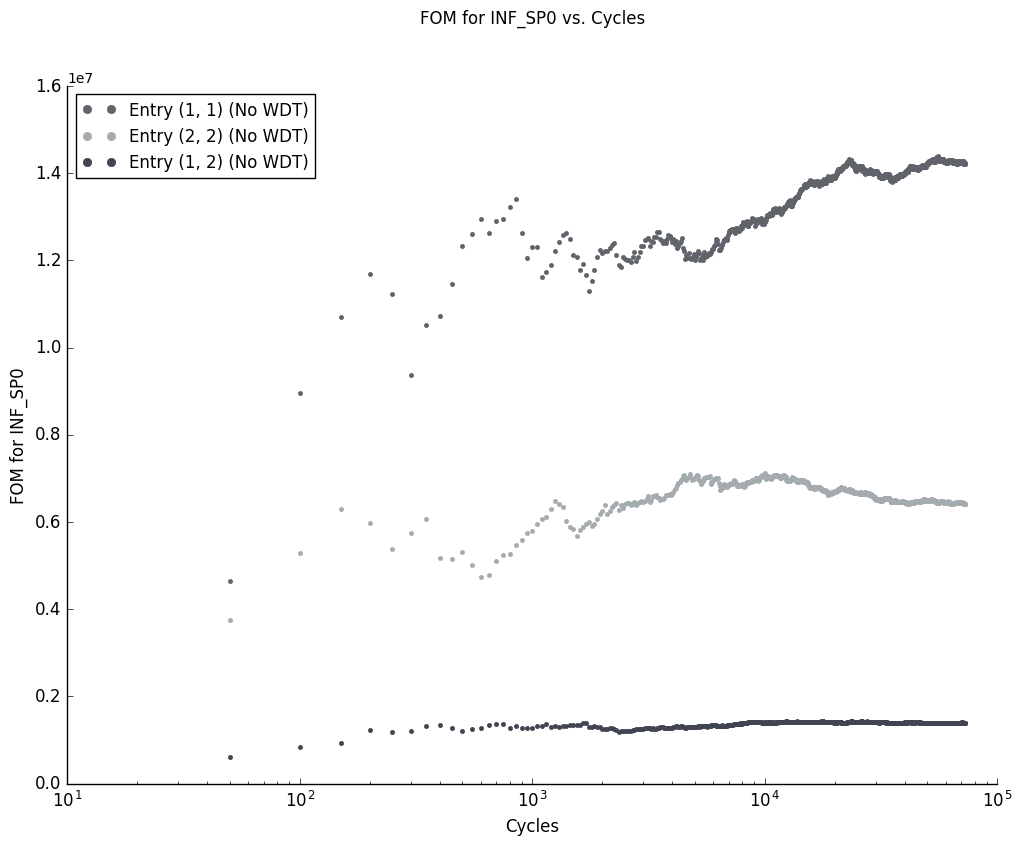

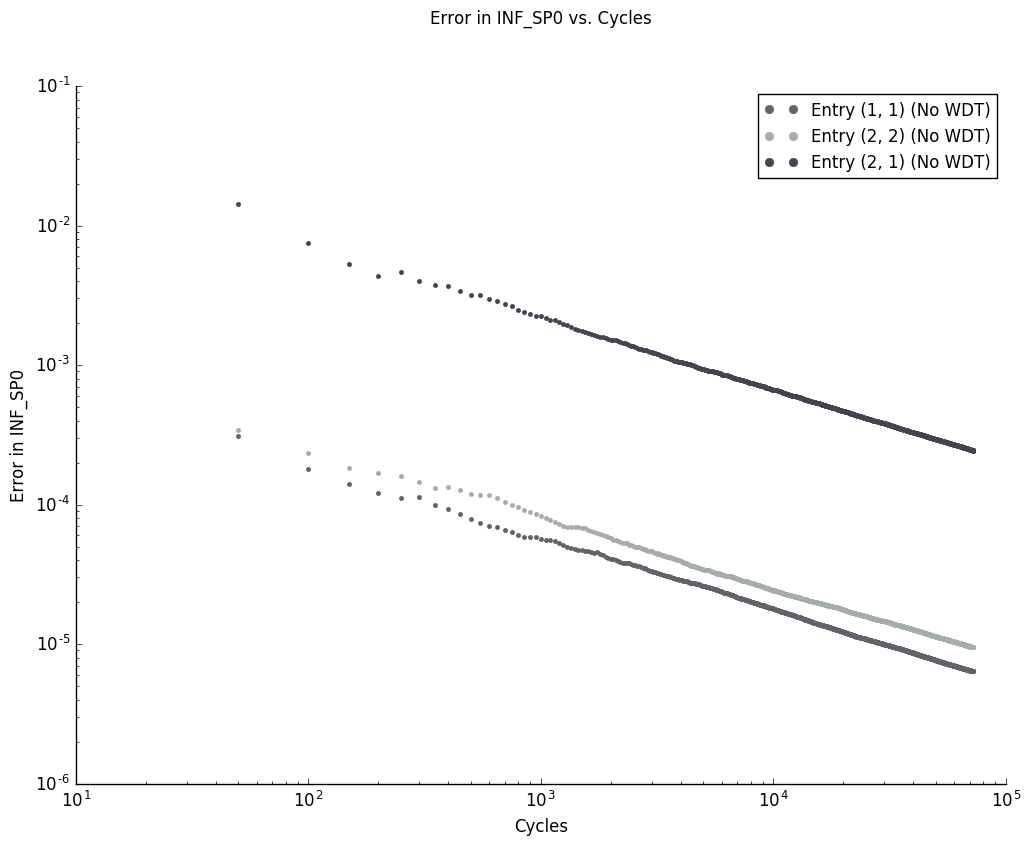

In [19]:
label = 'INF_SP0'
my_comparator.plot(label, [(1,1),(2,2),(1,2)], fom=True)
my_comparator.plot(label, [(1,1),(2,2),(2,1)], fom=False)

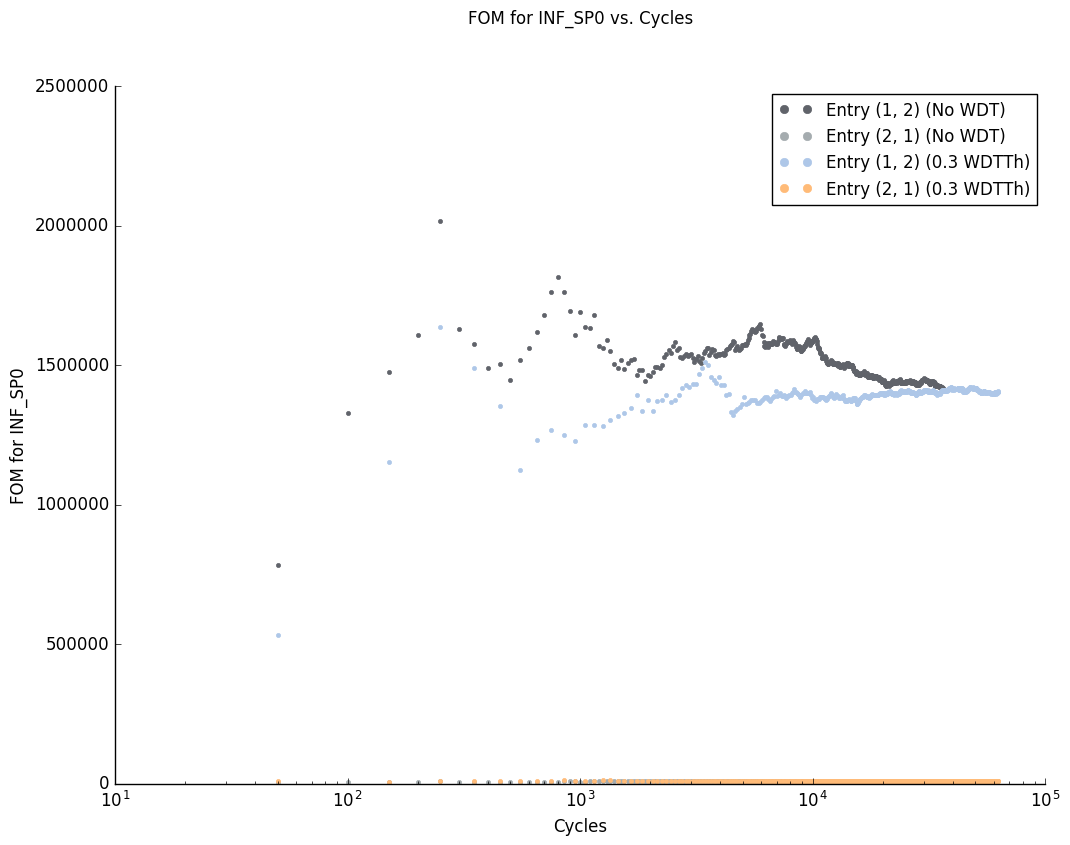

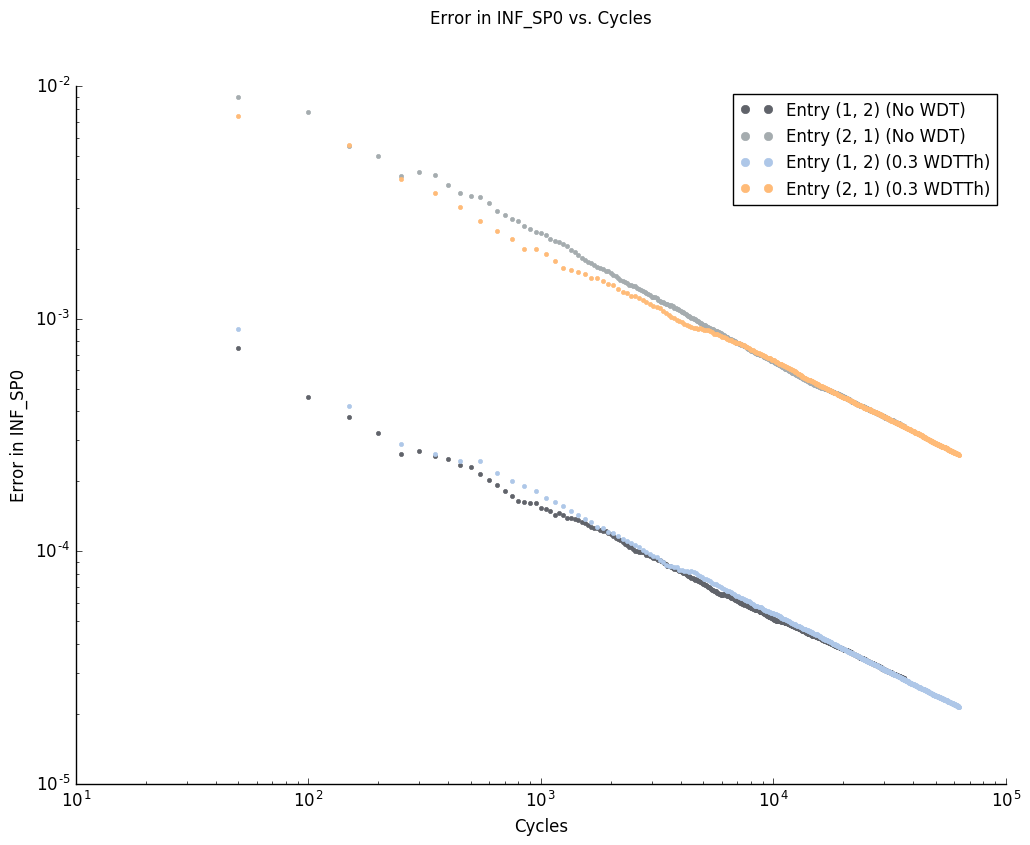

In [11]:
label = 'INF_SP0'
my_comparator.plot(label, [(1,2),(2,1)], cycle=True, fom=True)
my_comparator.plot(label, [(1,2),(2,1)], cycle=True, fom=False)

#### Diagonal Entries

In [37]:
my_comparator.data[0].name

'No WDT'

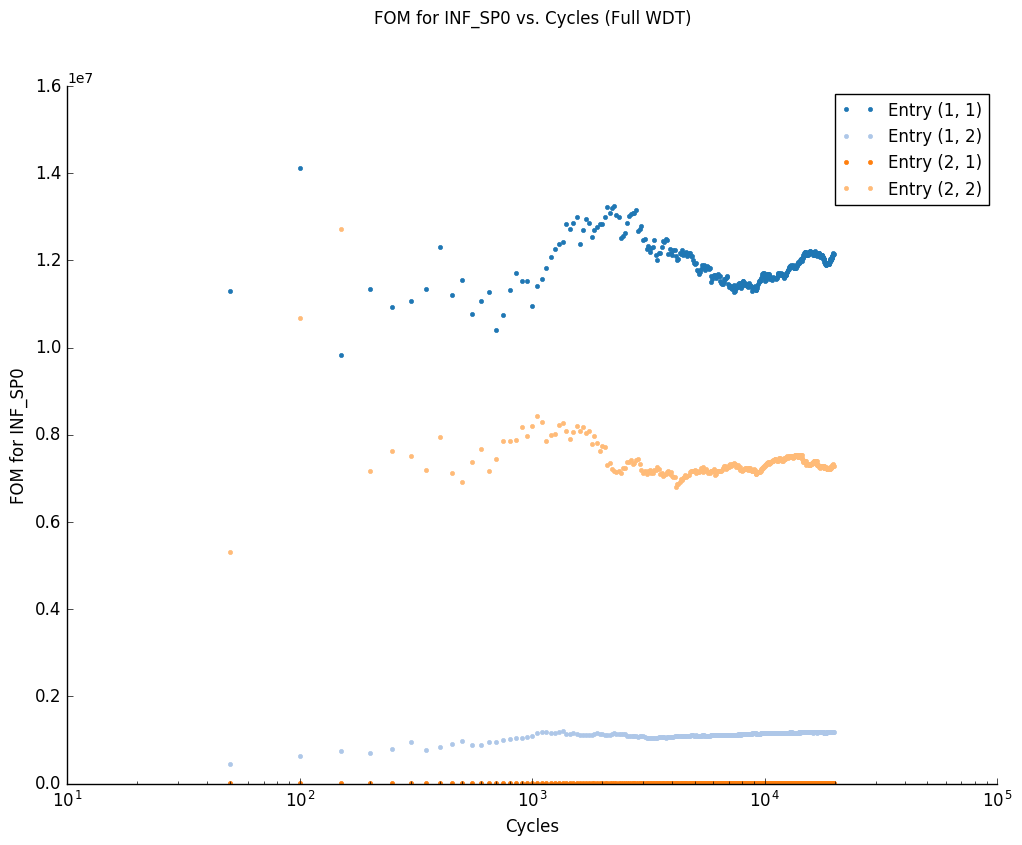

In [40]:
data = my_comparator.data[2].get_data('INF_SP0', [(1,1),(1,2),(2,1),(2,2)], fom = True, plot = True, cycle = True)

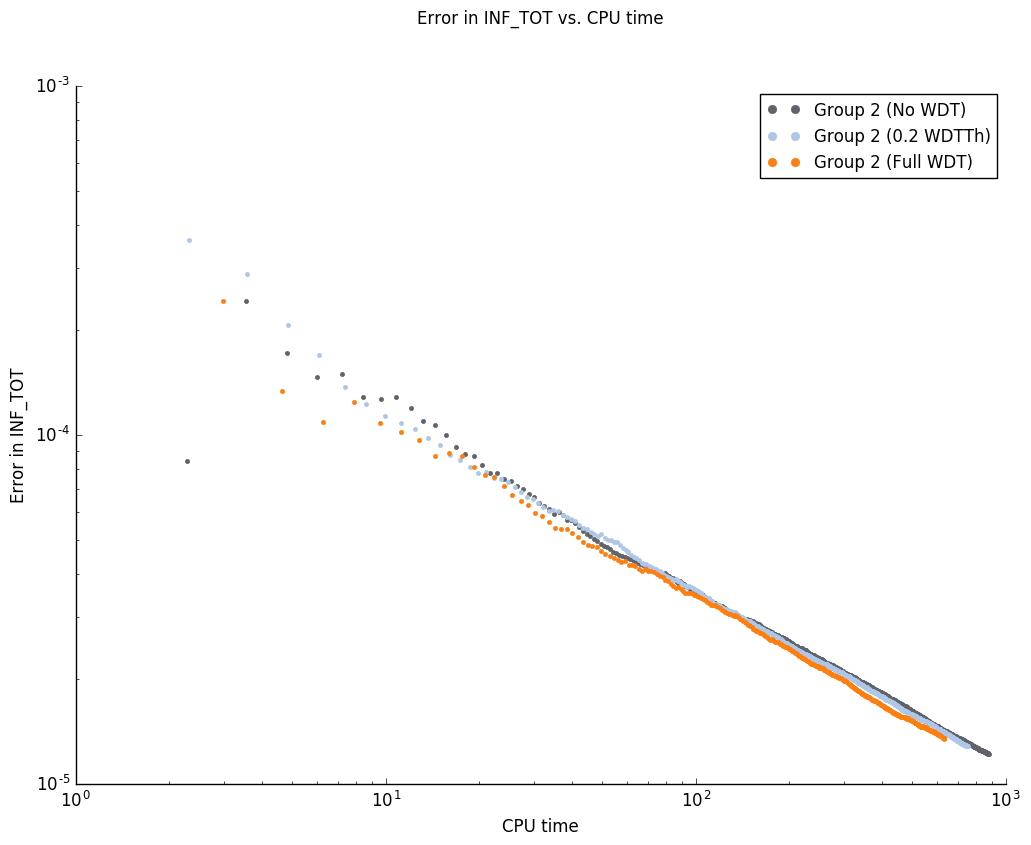

In [51]:
my_comparator.plot('INF_TOT', 2, fom = False, cycle = False)

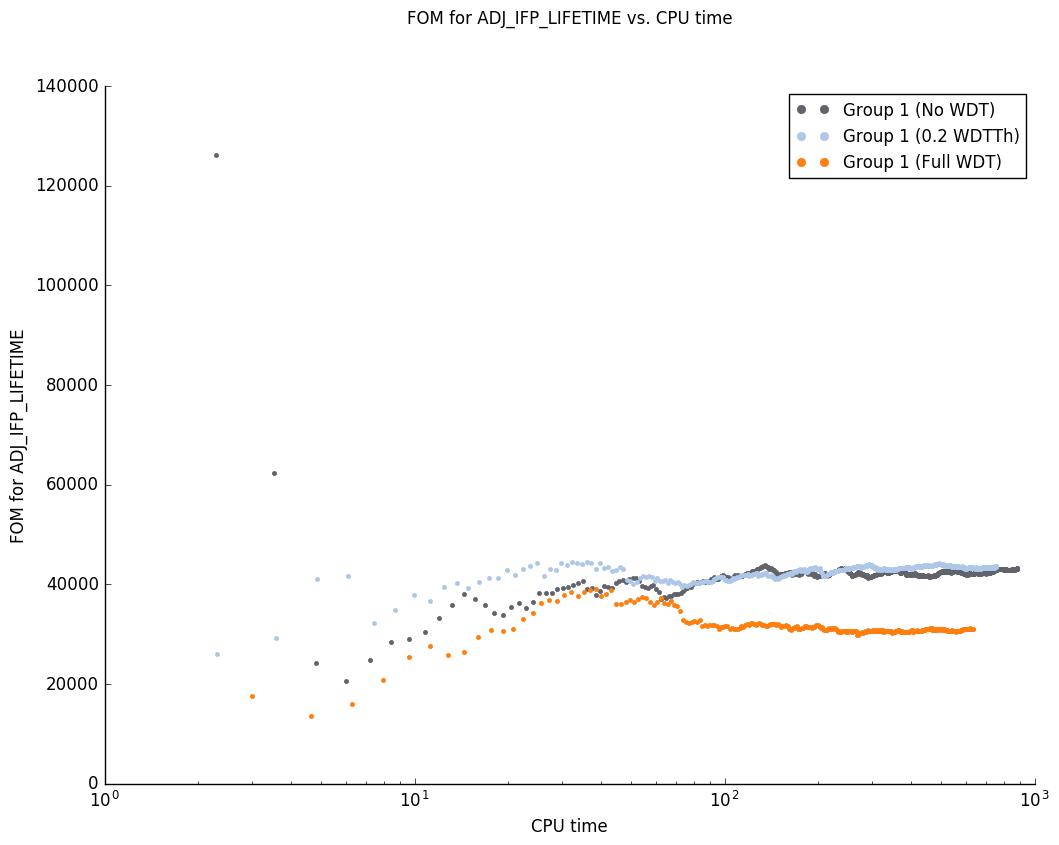

In [59]:
my_comparator.plot('ADJ_IFP_LIFETIME', 1, fom = True, cycle = False)

In [20]:
import analysis.widgets as widgets


In [21]:
%matplotlib notebook
reload(widgets)
widgets.comparatorWidget(my_comparator)

TypeError: plot() takes at least 3 arguments (4 given)

In [13]:
arr = np.array([1])
arr[0] == 1

True